In [1]:
import tensorflow as tf

In [2]:
# set the variables
x = tf.Variable(3,name = "x")
y = tf.Variable(4, name='y')

# create the computation graph
f = x*x*y+y+2

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
# create session
sess = tf.Session()

# initialize variables
sess.run(x.initializer)
sess.run(y.initializer)

result = sess.run(f)
print(result)

sess.close()

42


In [4]:
with tf.Session() as sess:
    x.initializer.run()
    y.initializer.run()
    
    result = f.eval()
result

42

In [5]:
init = tf.global_variables_initializer() # prepare an init node

with tf.Session() as sess:
    init.run()
    result = f.eval()
result

42

Any node created is automaticaly added to the default graph

In [6]:
x1 = tf.Variable(1)
x1.graph is tf.get_default_graph()

True

In [7]:
graph = tf.Graph()
with graph.as_default():
    # create x2 on the default graph (which is temporarilly graph)
    x2 = tf.Variable(2)

print(x2.graph is graph)

print(x2.graph is tf.get_default_graph())

True
False


In [8]:
w = tf.constant(3)
x = w + 2
y = x + 5
z = x * 3

# run twice x and w.
with tf.Session() as sess:
    print(y.eval()) # 10
    print(z.eval()) # 15

10
15


In [9]:
# run onl once w and x.
with tf.Session() as sess:
    y_val, z_val = sess.run([y,z])
    print(y_val)
    print(z_val)

10
15


## Keras API

In [10]:
from tensorflow import keras

In [11]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full), (X_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [14]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

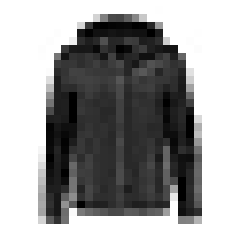

Coat


In [20]:
import matplotlib.pyplot as plt

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


def plot_image(img):
    plt.imshow(img,cmap='binary')
    plt.axis(False)
plot_image(X_train[0])
plt.show()

print(class_names[y_train[0]])

## Sequential API
#### MLP Regression

In [24]:
model = keras.Sequential() # sequential API

# convert input into 1D array = preprocessing. First layer => specify input_shape
model.add(keras.layers.Flatten(input_shape=[28,28]))
# Fully connected / Dense layer, specify nb units and activation functions.
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.layers

In [31]:
print(model.layers[1].name)
print(model.get_layer('dense_6').name)

dense_6
dense_6


In [35]:
# Use sparse_categorical_crossentropy because we have y sparse, cad y = nb between 0 and 9.
# It is not one-hot encoded vec.

model.compile(loss='sparse_categorical_crossentropy', # or keras.losses.sparse_categorical_crossentropy
             optimizer='sgd', # or keras.optimizers.SGD()
             metrics=['accuracy']) # or [keras.metrics.sparse_categorical_accuracy]

In [36]:
history = model.fit(X_train,y_train, epochs=30, validation_data=(X_valid,y_valid), verbose=1, batch_size=32)
# set class_weight if underrepresented classes

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 7s 130us/sample - loss: 0.7069 - acc: 0.7694 - val_loss: 0.5086 - val_acc: 0.8252
Epoch 2/30
55000/55000 [==============================] - 7s 121us/sample - loss: 0.4861 - acc: 0.8312 - val_loss: 0.4722 - val_acc: 0.8438
Epoch 3/30
55000/55000 [==============================] - 6s 111us/sample - loss: 0.4436 - acc: 0.8445 - val_loss: 0.4232 - val_acc: 0.8566
Epoch 4/30
55000/55000 [==============================] - 6s 110us/sample - loss: 0.4177 - acc: 0.8539 - val_loss: 0.4057 - val_acc: 0.8648
Epoch 5/30
55000/55000 [==============================] - 6s 111us/sample - loss: 0.3972 - acc: 0.8612 - val_loss: 0.4034 - val_acc: 0.8614
Epoch 6/30
55000/55000 [==============================] - 6s 107us/sample - loss: 0.3814 - acc: 0.8656 - val_loss: 0.3735 - val_acc: 0.8720
Epoch 7/30
55000/55000 [==============================] - 6s 107us/sample - loss: 0.3686 - acc: 0.8692 - val_lo

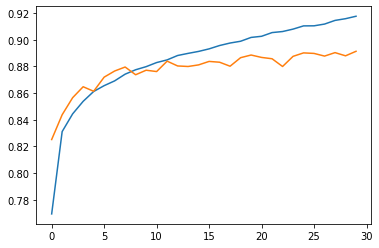

In [45]:
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(history.epoch,acc)
plt.plot(history.epoch,val_acc)
plt.show()

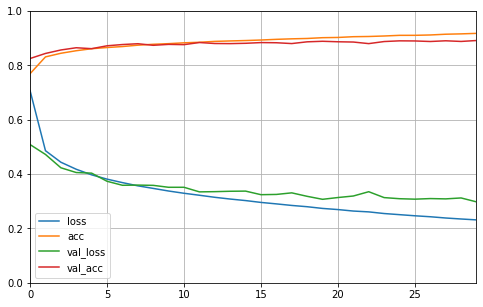

In [46]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [47]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 0s 47us/sample - loss: 2.5381 - acc: 0.8406


[2.5380618139003768, 0.8406]

In [55]:
preds = model.predict(X_test[:3])
preds

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

#### MLP Regression

In [105]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [108]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error', optimizer=keras.optimizers.SGD(lr=1e-3))

history = model.fit(X_train_scaled, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 96us/sample - loss: 2.3383 - val_loss: 10.3520
Epoch 2/20
11610/11610 [==============================] - 0s 39us/sample - loss: 1.5459 - val_loss: 3.8200
Epoch 3/20
11610/11610 [==============================] - 0s 37us/sample - loss: 1.4544 - val_loss: 2.3329
Epoch 4/20
11610/11610 [==============================] - 0s 37us/sample - loss: 1.4287 - val_loss: 1.8925
Epoch 5/20
11610/11610 [==============================] - 0s 36us/sample - loss: 1.4135 - val_loss: 1.6704
Epoch 6/20
11610/11610 [==============================] - 0s 37us/sample - loss: 1.4028 - val_loss: 1.5592
Epoch 7/20
11610/11610 [==============================] - 0s 37us/sample - loss: 1.3941 - val_loss: 1.5100
Epoch 8/20
11610/11610 [==============================] - 0s 37us/sample - loss: 1.3872 - val_loss: 1.4835
Epoch 9/20
11610/11610 [==============================] - 1s 44us/sample - loss: 1.3816 - val_

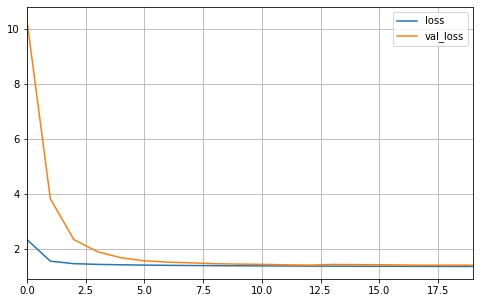

In [109]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

## Functionnal API

build more complexe architecture with re-use of the inputs in the last layer to keep some simple relations

In [110]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)

model = keras.models.Model(inputs=[input_], outputs=[output])

In [112]:
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.SGD(lr=1e-3))

history = model.fit(X_train_scaled, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 112us/sample - loss: 1.3524 - val_loss: 1.7758
Epoch 2/20
11610/11610 [==============================] - 1s 45us/sample - loss: 1.3351 - val_loss: 1.4270
Epoch 3/20
11610/11610 [==============================] - 0s 43us/sample - loss: 1.3324 - val_loss: 1.3741
Epoch 4/20
11610/11610 [==============================] - 0s 43us/sample - loss: 1.3319 - val_loss: 1.3497
Epoch 5/20
11610/11610 [==============================] - 1s 49us/sample - loss: 1.3315 - val_loss: 1.3515
Epoch 6/20
11610/11610 [==============================] - 1s 49us/sample - loss: 1.3315 - val_loss: 1.3445
Epoch 7/20
11610/11610 [==============================] - 1s 46us/sample - loss: 1.3312 - val_loss: 1.3380
Epoch 8/20
11610/11610 [==============================] - 1s 52us/sample - loss: 1.3312 - val_loss: 1.3403
Epoch 9/20
11610/11610 [==============================] - 1s 49us/sample - loss: 1.3311 - val_

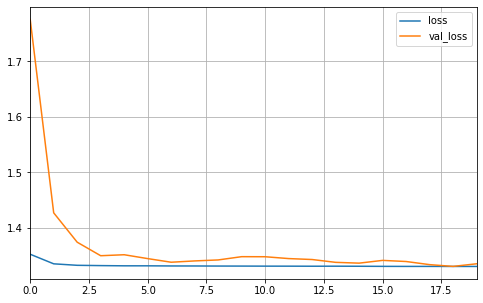

In [113]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

build more complexe architecture spliting the features. Some are use during the whole process and other are use only in the end.

In [114]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)

model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [116]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 120us/sample - loss: 0.4328 - val_loss: 0.4164
Epoch 2/20
11610/11610 [==============================] - 1s 48us/sample - loss: 0.4302 - val_loss: 0.4112
Epoch 3/20
11610/11610 [==============================] - 1s 47us/sample - loss: 0.4279 - val_loss: 0.4111
Epoch 4/20
11610/11610 [==============================] - 1s 51us/sample - loss: 0.4257 - val_loss: 0.4129
Epoch 5/20
11610/11610 [==============================] - 1s 59us/sample - loss: 0.4238 - val_loss: 0.4015
Epoch 6/20
11610/11610 [==============================] - 1s 53us/sample - loss: 0.4216 - val_loss: 0.4171
Epoch 7/20
11610/11610 [==============================] - 1s 50us/sample - loss: 0.4200 - val_loss: 0.4245
Epoch 8/20
11610/11610 [==============================] - 1s 46us/sample - loss: 0.4187 - val_loss: 0.4003
Epoch 9/20
11610/11610 [==============================] - 1s 50us/sample - loss: 0.4171 - val_

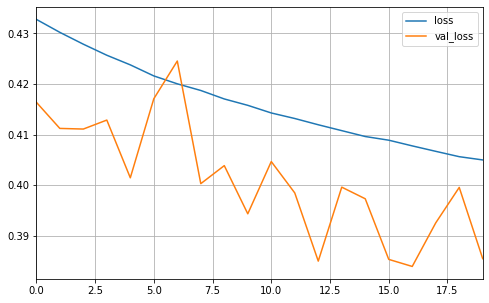

In [117]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

Outputs auxilaires

In [118]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")

hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])

output = keras.layers.Dense(1, name="output")(concat)
aux_output = keras.layers.Dense(1)(hidden2)

model = keras.models.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [119]:
# preciser loss pour chaque output, donner un poids
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

# donner y_train et y_val plusieurs fois
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 110us/sample - loss: 0.9823 - output_loss: 0.8756 - dense_57_loss: 1.9399 - val_loss: 3.8178 - val_output_loss: 4.0754 - val_dense_57_loss: 1.4825
Epoch 2/20
11610/11610 [==============================] - 1s 55us/sample - loss: 0.5396 - output_loss: 0.4853 - dense_57_loss: 1.0265 - val_loss: 12.3148 - val_output_loss: 12.9048 - val_dense_57_loss: 6.9424
Epoch 3/20
11610/11610 [==============================] - 1s 53us/sample - loss: 0.5298 - output_loss: 0.4912 - dense_57_loss: 0.8766 - val_loss: 1.6387 - val_output_loss: 1.7306 - val_dense_57_loss: 0.8047
Epoch 4/20
11610/11610 [==============================] - 1s 53us/sample - loss: 0.4566 - output_loss: 0.4253 - dense_57_loss: 0.7376 - val_loss: 0.5657 - val_output_loss: 0.4845 - val_dense_57_loss: 1.2964
Epoch 5/20
11610/11610 [==============================] - 1s 54us/sample - loss: 0.4370 - output_loss: 0.4103 - dense_57

In [120]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

5160/5160 [==============================] - 0s 31us/sample - loss: 0.3664 - output_loss: 0.3499 - dense_57_loss: 0.5136
